# The Bayesian Framework - Lab

## Introduction

For inference, we are interested in beliefs, which can be interpreted as probabilities by thinking Bayesian. We have a prior belief in event A, beliefs formed by previous information, e.g., our prior belief about bugs being in our code before performing tests. Secondly, we observe our evidence and update our belief to incorporate it. We call this new belief the posterior probability. Updating our belief is done via Bayes' Theorem. Let's try to run a simulation in this lab for our coin toss experiment to see Bayesian Inferencing in action. 

## Objectives

You will be able to:

- Understand and describe the Bayesian Inference framework
- Evaluate the impact of evidence on posterior probabilities
- Run Bayesian simulations for simple problems in python, numpy and matplotlib

## Problem - coins again !!

Suppose, that we are unsure about the probability of heads in a coin flip (spoiler alert: it's 50%). You believe there is some true underlying ratio, call it **p**, but have no prior opinion on what p might be.

We begin to flip a coin, and record the observations: either H or T. This is our observed data. 

An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data.

For this lab, you are supposed t update posterior probabilities as you observe observe increasing amounts of data (coin flips).

Let's first import the necessary libraries

In [2]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
plt.style.use('ggplot')
figsize(15, 15)

* Use a beta prior from `stats.beta` distribution
* Check posterior probabilities for each number of trials in `n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]`
* Generate data for experiment by generating random bernoulli variables from `stats.bernoulli.rvs()` 
* Use a binomial conjugate prior
* Maximize the theta for posterior probabilities and update belief 
* Plot your output for each trial

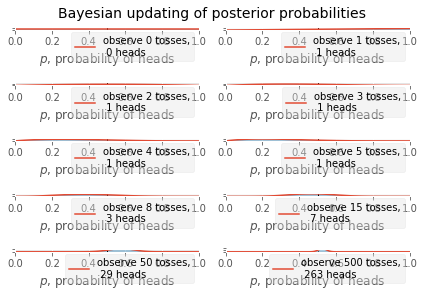

In [3]:
# Run the simulation - Your code here 
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)


for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads")
    plt.setp(sx.get_yticklabels(), visible=False)
    
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

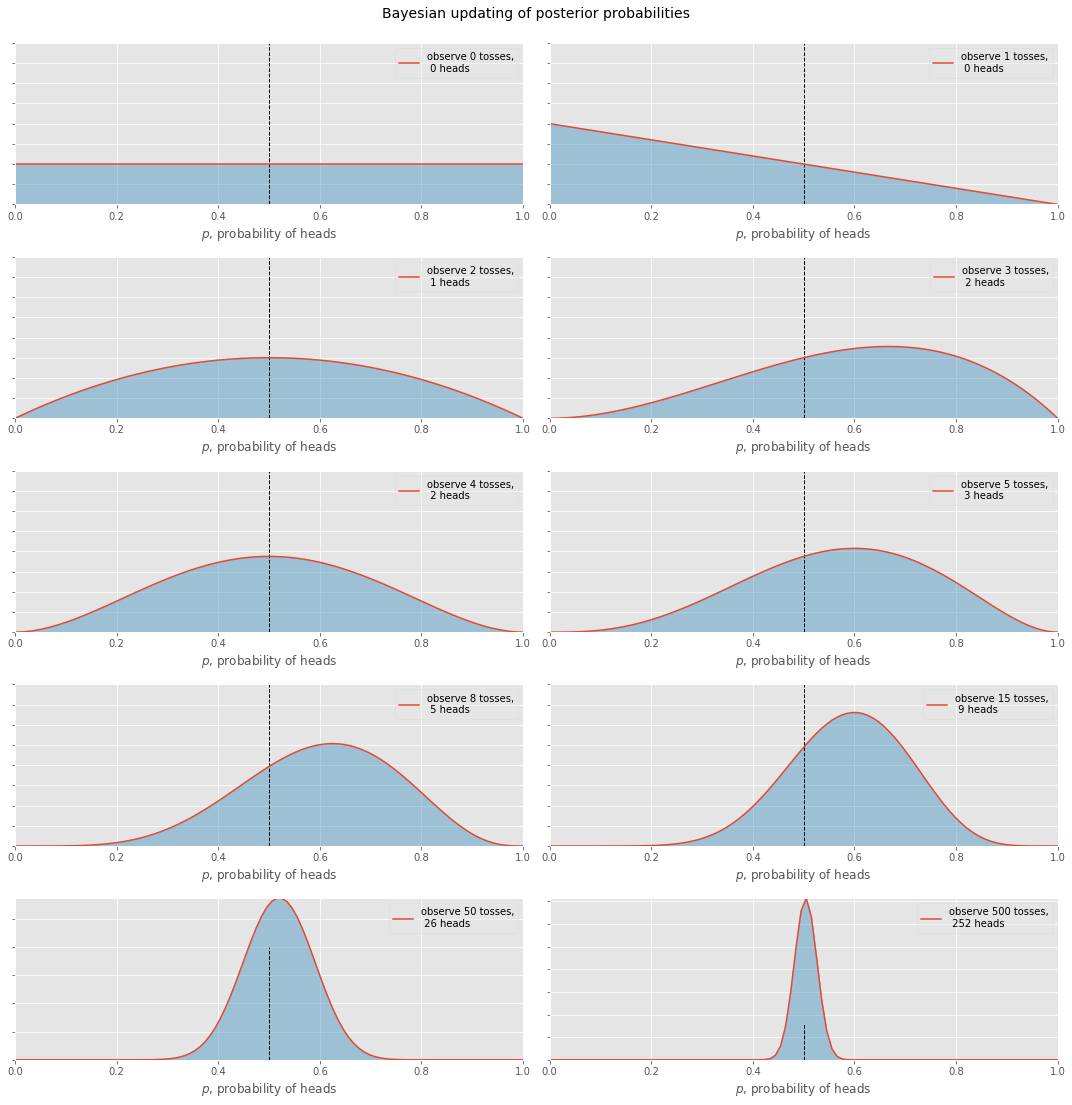

In [9]:
# Sample output

In [4]:
# Record your observations here 

```
The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of p=0.5 (marked by a dashed line).

Notice that the plots are not always peaked at 0.5. There is no reason it should be: recall we assumed we did not have a prior opinion of what p is. In fact, if we observe quite extreme data, say 8 flips and only 1 observed heads, our distribution would look very biased away from lumping around 0.5 (with no prior opinion, how confident would you feel betting on a fair coin after observing 8 tails and 1 head). As more data accumulates, we would see more and more probability being assigned at p=0.5, though never all of it.
    ```

## Summary 

In this lab , we looked at the Bayesian inferencing framework in action using simple coin toss example. We saw that with increasing evidence, the posterior probability comes close to the actual probability of a fair coin toss. You could think of increasing the number of trials further to see if it becomes 0.5 exactly , or if you can see some sort of relationship between number of samples and posterior probability. 